In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm
import os

In [3]:
df_dados = pd.read_csv('Advertising.csv')
df_dados.shape

(200, 5)

In [4]:
df_dados.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df_dados.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df_dados.drop(['Unnamed: 0'],axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Text(0, 0.5, 'Vendas')

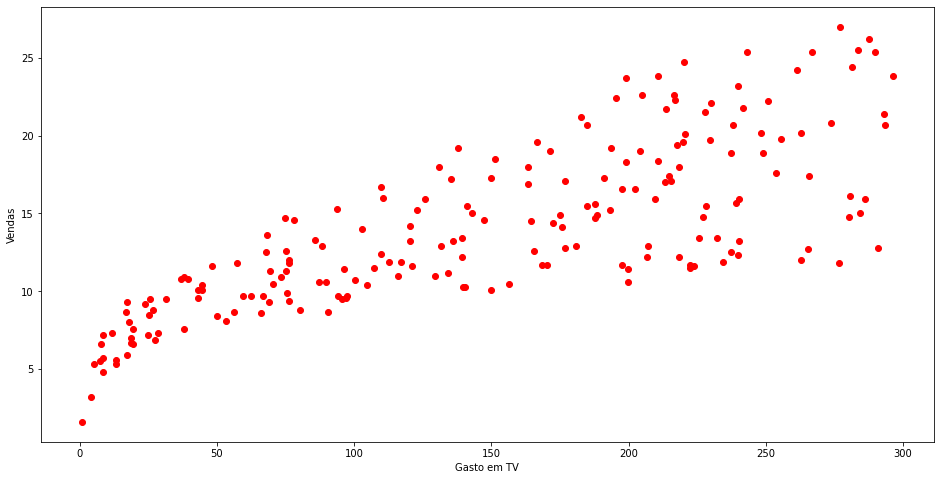

In [7]:
plt.figure(figsize=(16,8))
plt.scatter(df_dados['TV'],df_dados['sales'],c='red')
plt.xlabel("Gasto em TV")
plt.ylabel ("Vendas")

Text(0.5, 0, 'newspaper')

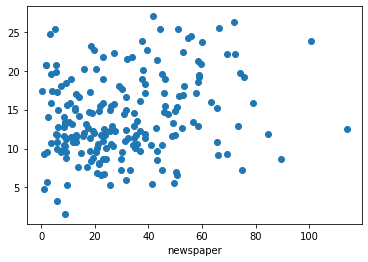

In [8]:
#estudado a relação entre sales e newspaper pois na regressão deu p value alto.

plt.scatter(df_dados['newspaper'],df_dados['sales'])
plt.xlabel('newspaper')

#realmente, da pra ver que nao tem relação linear com vendas

In [11]:
numeros = df_dados.select_dtypes(include=[np.number])
corr = numeros.corr()

corr['sales'].sort_values(ascending = False)



sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64

In [23]:
#modelo para prever retorno com investimento em TV
X = df_dados['TV'].values.reshape(-1,1)
y = df_dados['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

coef1 = reg.intercept_[0]
coef2 = reg.coef_[0][0]

print("O modelo é: Vendas = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é: Vendas = 7.0326 + 0.047537X


In [28]:
print(coef1+(coef2*500))

30.800913765637567


Text(0, 0.5, 'Vendas')

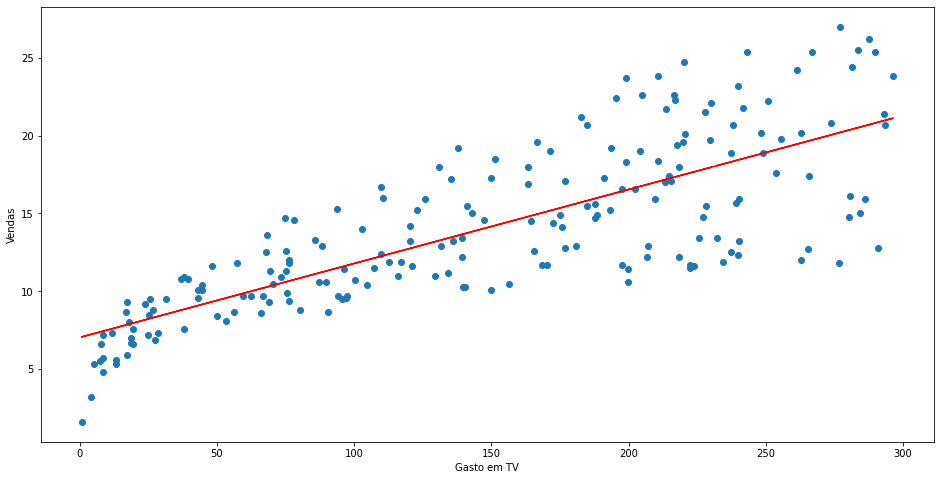

In [36]:
previsoes = reg.predict(X)
plt.figure(figsize=(16,8))
plt.scatter(X,y)
plt.plot(X,previsoes,c='red')
plt.xlabel('Gasto em TV')
plt.ylabel('Vendas')

In [37]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           1.47e-42
Time:                        12:38:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [47]:
Xs = df_dados.drop(['sales', 'Unnamed: 0'], axis=1)
y = df_dados['sales'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(Xs, y)

print("O modleo é: Vendas = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

O modleo é: Vendas = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


In [49]:
X2 = sm.add_constant(Xs)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

#newspaper tem um p valor muito alto

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           1.58e-96
Time:                        13:28:28   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [50]:
#sem newspaper

Xs = df_dados.drop(['sales', 'Unnamed: 0','newspaper'], axis=1)
y = df_dados['sales'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(Xs, y)

X2 = sm.add_constant(Xs)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           4.83e-98
Time:                        13:29:51   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0